# Text Analytics


# Assignment 2

### *Submitted by:*  

**Zena Drakou | Marissa Hausman | Hitesh Prabhu | Chase Slocum | Yawen Ye - MSBA 2017 **

**Sept 21, 2016**

### Initial Setup:

1. Importing libraries
2. Reading dataset

In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn import metrics

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
yelp = pd.read_csv('../files/Yelp Data Restaurant Reviews Ratings.csv')
yelp["rating_class"] = 0
yelp.loc[yelp["stars"] >= 4, "rating_class"] = 1
yelp.loc[yelp["stars"] <= 3, "rating_class"] = 0
yelp[19990:]

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating_class
19990,5,9,3,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Well hate to join the bandwagon but this pla...,1
19991,3,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Tucked into a small stripmall this tiny sushi...,0
19992,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,I have been looking for great sushi in AZ and ...,1
19993,4,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,A very small local restaurant with a very inti...,1
19994,5,3,1,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,my first yelp! review and it s because of Yas...,1
19995,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Good. Intimate. Expensive.,0
19996,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Great place! The food is really good. This is...,1
19997,3,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,The location is convenient and I would say tha...,0
19998,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,I am a sushi snob.I live in Chicago but used ...,1


# Task A

### Ignore the text (reviews) and run a classification model with the numeric data (you can use standard methods like logistic regression, k-nearest neighbors or anything else). What is the best accuracy of your model with numeric data?

**KNN**

C:\ProgramData\Anaconda2\envs\hitesh27\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


3 	0.610202550638
5 	0.63375843961
7 	0.635858964741
9 	0.654313578395
12 	0.637059264816
16 	0.675618904726
20 	0.677269317329
25 	0.681770442611
35 	0.686271567892
50 	0.688672168042
75 	0.687321830458
100 	0.685821455364
250 	0.681320330083
500 	0.678019504876


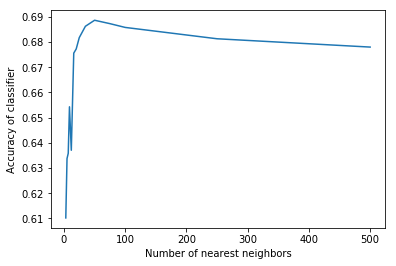

In [5]:
import random
from numpy.random import permutation
yelp_num = yelp
yelp_num = yelp_num.drop('Review', 1)

# Randomly shuffle the index of yelp_num.
random_index = permutation(yelp_num.index)

# Set a cutoff for how many items we want in the test set 
cutoff = math.floor(len(yelp_num)/3)
cutoff = int(cutoff)

# Generate the test set by taking the first 1/3 of the randomly shuffled index.
test = yelp_num.loc[random_index[1:cutoff]]

# Generate the train set.
train = yelp_num.loc[random_index[cutoff:]]

# The columns that we will be making predictions with.
x_columns = ['votes_cool',
             'votes_funny',
             'votes_useful',
             'Cheap',
             'Moderate',
             'Expensive',
             'VeryExpensive',
             'American',
             'Chinese',
             'French',
             'Japanese',
             'Indian',
             'Italian',
             'Greek',
             'Mediterranean',
             'Mexican',
             'Thai',
             'Vietnamese',
             'Others']

# The column that we want to predict.
y_column = ["rating_class"]


from sklearn.neighbors import KNeighborsClassifier

# Function runs Knn for given value of k
def run_knn(n):
    model = KNeighborsClassifier(n_neighbors = n,
                                 weights = 'uniform')
    model.fit(train[x_columns], train[y_column].values)

    # Make predictions on the test set using the fitted model.
    predictions = model.predict(test[x_columns].values)
    accuracy = metrics.accuracy_score(test[y_column], predictions)
    return accuracy

k_list = [3,5,7,9,12,16,20,25,35,50,75,100,250,500]  
scores = [run_knn(k) for k in k_list]
plt.plot(k_list, scores)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy of classifier')

for k, scores in zip(k_list, scores):
    print k, "\t", scores

In [6]:
# Looks like k=50 looks like a good value for k
k = 50
model = KNeighborsClassifier(n_neighbors = k,
                                 weights = 'uniform')
model.fit(train[x_columns], train[y_column])

# Make predictions on the test set using the fitted model.
predictions = model.predict(test[x_columns])
accuracy = metrics.accuracy_score(test[y_column], predictions)
print "KNN run for n = {}".format(k)
print(metrics.classification_report(test[y_column], predictions))

C:\ProgramData\Anaconda2\envs\hitesh27\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNN run for n = 50
             precision    recall  f1-score   support

          0       0.60      0.10      0.17      2146
          1       0.69      0.97      0.81      4519

avg / total       0.66      0.69      0.60      6665



_The accuracy obtained for knn was 67%._

**Logistic Regression**

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(train[x_columns], train[y_column])

y = test[y_column]
predict_logistic = logistic_model.predict(test[x_columns])

#print metrics.accuracy_score(y, predict_logistic)
print(metrics.classification_report(y, predict_logistic))

             precision    recall  f1-score   support

          0       0.63      0.06      0.11      2146
          1       0.69      0.98      0.81      4519

avg / total       0.67      0.69      0.58      6665



C:\ProgramData\Anaconda2\envs\hitesh27\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_The accuracy obtained for Logistic Regression was 66%._

**SVC**

In [8]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(train[x_columns], train[y_column])

# make predictions
expected = test[y_column]
predicted = model2.predict(test[x_columns])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.66      0.03      0.05      2146
          1       0.68      0.99      0.81      4519

avg / total       0.67      0.68      0.56      6665

[[  54 2092]
 [  28 4491]]


_The accuracy obtained for SVM model was 68%._

In [9]:
# Baseline score
len(yelp[yelp['rating_class'] == 1])
len(yelp[yelp['rating_class'] == 0])

print "Baseline accuracy =", float(len(yelp[yelp['rating_class'] == 1]))/( float(len(yelp[yelp['rating_class'] == 1])) + float(len(yelp[yelp['rating_class'] == 0])))


Baseline accuracy = 0.677683884194


All three classification models that we tested on the with the numeric data gave a similar accuracy of around 66-68%, which doesn't really improve upon the baseline accuracy.

# Task B

### Perform a supervised classification on a subset of the corpus using the reviews only. You can write your code in Python or R. What accuracy do you get from this text mining exercise?

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np


# put rating class into list
rating_class = yelp['rating_class'].values.tolist()

corpus = yelp['Review']
corpus_list = corpus.values.tolist()

bag_of_words_vectorizer = CountVectorizer(min_df = 1)
matrix_corpus = bag_of_words_vectorizer.fit_transform(corpus_list)
words_counts = matrix_corpus.toarray()

tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(words_counts)

bag_of_words_vectorizer.get_feature_names()
text = tfidf.toarray()

text_train = text[:10000]
text_test = text[10000:]

text_aim1 = []
text_aim2 = []

for i in range(10000):
    text_aim1.append(rating_class[i])

for i in range(10000,19999):
    text_aim2.append(rating_class[i])


logistic_model3 = LogisticRegression()
logistic_model3.fit(text_train, text_aim1)

predict_logistic3 = logistic_model3.predict(text_test)
#print metrics.accuracy_score(y, predict_logistic)
print(metrics.classification_report(text_aim2, predict_logistic3))

             precision    recall  f1-score   support

          0       0.84      0.67      0.74      3194
          1       0.86      0.94      0.90      6805

avg / total       0.85      0.85      0.85      9999



In [11]:
# See how many 'matched' pair between predicted and actual rating value. They are in total 9999 pairs
count = 0
for i in range(len(text_test)):
    if text_aim2[i] == predict_logistic3[i]:
        count = count + 1
count

8533

_In the test set of 9999 rows between predicted and actual value, there are 8543 pairs which are matched (predicted and actual values are equal). So the percent of accuracy is 8543/9999 = 85%._

_Comment: As we can see, by only using the text part (reviews) to train the logistic model and prediction, we can achieve a test accuracy about 85%._

# TASK C

### Combine the numeric data and the text classification model (in task B) to create a “hybrid” model. It is your task to figure out how to do this. Now run this hybrid classification model and compare the results with those in A and B. Does the numeric data add to the predictive power relative to text?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

# extract only numeric column from table
numeric = yelp[x_columns]
# put each row of numeric into list
numeric_list = numeric.values.tolist()
# put rating class into list
rating_class = yelp['rating_class'].values.tolist()

corpus = yelp['Review']
corpus_list = corpus.map(lambda s: s.decode('latin-1').encode("utf-8")).tolist()
bag_of_words_vectorizer = CountVectorizer(min_df=1)
matrix_corpus = bag_of_words_vectorizer.fit_transform(corpus_list)
words_counts = matrix_corpus.toarray()
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(words_counts)
bag_of_words_vectorizer.get_feature_names()

# Combine the numeric features with the text features by stacking them
combinedFeatures = np.hstack([numeric_list, tfidf.toarray()])

In [13]:
train = combinedFeatures[:10000]
test = combinedFeatures[10000:]

aim1 = []
aim2 = []

for i in range(10000):
    aim1.append(rating_class[i])

for i in range(10000,19999):
    aim2.append(rating_class[i])


logistic_model2 = LogisticRegression()
logistic_model2.fit(train, aim1)

predict_logistic2 = logistic_model2.predict(test)

#print metrics.accuracy_score(y, predict_logistic)
print(metrics.classification_report(aim2, predict_logistic2))

             precision    recall  f1-score   support

          0       0.84      0.67      0.74      3194
          1       0.86      0.94      0.90      6805

avg / total       0.85      0.85      0.85      9999



In [14]:
# See how many 'matched' pair between predicted and actual rating value. They are in total 9999 pairs

test = 0

for i in range(len(aim2)):
    if aim2[i] == predict_logistic2[i]:
        test = test + 1
test

8529

_It seems that combining the numeric feature does not add power to our prediction compared to B. In part B, we achieved a percent of accuracy about 85%, but after hybrid the numeric features with the text features, the accuracy stays at the same level, which suggests that the numeric values/features does not contribute to our prediction. The text features seem more relevant for the customers' actual rating._

# TASK D

### Use unsupervised sentiment analysis on the reviews (with SentiStrength or any other tool) and use the sentiment scores to predict high/low rating. Compare and contrast the results of tasks B and D. What can you conclude from your analysis?

In [15]:
SentiStrength_Results = pd.read_csv("../files/YelpReviews_SentiStrength_Results.csv")
SentiStrength_Results[:10]

,Review,Positive,Negative,Sentiment,In_Words
0,CLOSED This JB s locati...,2,-2,0,nuetral
1,This is just a basic (albeit mini) chain greas...,2,-2,0,nuetral
2,Whenever I offer to take my mom out to lunch s...,4,-4,0,nuetral
3,If I say it wasn t as bad as I was expecting i...,3,-3,0,nuetral
4,I ve always said if the guacamole chips and s...,3,-3,0,nuetral
5,Had the signature Black Chile entree. It was ...,3,-1,2,positive
6,After hitting up the bank to sign some paper w...,4,-4,0,nuetral
7,Great happy hour deals here! I loved the Cotij...,4,-5,-1,negative
8,Fine. Just fine. C /B- average-- all around. ...,4,-3,1,positive
9,beautiful atmosphere...good prices (for the bi...,3,-1,2,positive


In [16]:
def classifier(Sentiment):
    if Sentiment > 0:
        return 1
    else:
        return 0


SentiStrength_Results['Prediction'] = SentiStrength_Results['Sentiment'].apply(classifier)
# For some unkown reason, the first review did not get rated on SentiStrength. Some bug with row 2 
# ( even though I omitted only row 1)
yelp = yelp[yelp['Review'] != "This location is out of business. I drove by it on my way to Costco and it just has a giant for lease sign."]
print yelp[:5]

   stars  votes_cool  votes_funny  votes_useful  Cheap  Moderate  Expensive  \
1      2           2            2             2      1         0          0   
2      4           0            0             1      1         0          0   
3      3           0            1             2      1         0          0   
4      3           7            9             9      1         0          0   
5      2           0            0             1      0         1          0   

   VeryExpensive  American  Chinese      ...       Indian  Italian  Greek  \
1              0         0        0      ...            0        0      0   
2              0         0        0      ...            0        0      0   
3              0         0        0      ...            0        0      0   
4              0         0        0      ...            0        0      0   
5              0         0        0      ...            0        0      0   

   Mediterranean  Mexican  Thai  Vietnamese  Others  \
1      

In [17]:
y_predicted = SentiStrength_Results['Prediction']
y_actual = yelp['rating_class']

print(metrics.classification_report(y_actual, y_predicted))

             precision    recall  f1-score   support

          0       0.56      0.57      0.56      6445
          1       0.79      0.78      0.79     13553

avg / total       0.72      0.71      0.71     19998



_After using unsupervised learning with SentiStrength, we were able to improve upon numeric-only models A and B with a 72% prediction accuracy - so just a slight imporvement over the baseline accuracy of 67%. Howvever, comparing it to task B, where we used using a supervised logistic regression models on the text provided far higher accuracies (~85%)._

# Task E

### Implement the PMI approach to sentiment analysis (in either Python or R), and run the classification model with the sentiment scores. How do your results compare with those in Task D?


In [18]:
#randomly sample 3000 rows
yelp_sample=yelp.sample(n=3000, random_state=10)

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words("english"))
# remove it if you need punctuation
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']',\
                   '{', '}','****', '#', '$', '-', '...', 'u', '&']) 

review = []
def tolist_utf8(h):
    review.append(h.decode('utf-8').lower())

r = yelp_sample["Review"]
r.map(tolist_utf8)

review_tokenize = []

#tokenize reviews
for review in review:
    word_tokenize = nltk.word_tokenize(review)
    lemma_word = map(lambda x: lemmatizer.lemmatize(x), word_tokenize)
    cleaned_text = filter(lambda x: x not in stop_words, lemma_word)
    review_tokenize.append(cleaned_text)

In [19]:
#print most common words and identify words to replace
words=[item for sublist in review_tokenize for item in sublist]
nltk.FreqDist(words).most_common(200)

[(u'wa', 7391),
 (u'food', 2520),
 (u'good', 2420),
 (u'place', 2411),
 (u'great', 1577),
 (u'like', 1496),
 (u'time', 1327),
 (u'one', 1236),
 (u'go', 1146),
 (u'get', 1113),
 (u'service', 1098),
 (u'really', 1093),
 (u'restaurant', 1032),
 (u'would', 1026),
 (u'back', 996),
 (u'menu', 843),
 (u'ordered', 797),
 (u'chicken', 782),
 (u'also', 759),
 (u'love', 740),
 (u'little', 726),
 (u'order', 687),
 (u'best', 668),
 (u'lunch', 665),
 (u'got', 659),
 (u'nice', 648),
 (u'table', 644),
 (u'salad', 642),
 (u'try', 635),
 (u'always', 613),
 (u'ha', 609),
 (u'even', 599),
 (u'well', 590),
 (u'make', 584),
 (u'sauce', 582),
 (u'drink', 571),
 (u'thing', 563),
 (u'meal', 561),
 (u'delicious', 554),
 (u'dish', 551),
 (u'went', 538),
 (u'much', 535),
 (u'cheese', 530),
 (u'burger', 529),
 (u'pretty', 527),
 (u'know', 505),
 (u'come', 495),
 (u'could', 494),
 (u'price', 487),
 (u'think', 480),
 (u'came', 476),
 (u'eat', 470),
 (u'friendly', 465),
 (u'phoenix', 455),
 (u'say', 451),
 (u'dinner'

_We used the above cell iteratively to identify new positive and negative words after running the cell below._

In [20]:
#create word lists by hand using word frequencies/intuition
positive_vocab = [
    u'good', u'nice', u'great', u'awesome', u'outstanding',
    u'fantastic', u'terrific', u':)', u':-)', u'like', u'love',
    u'cute',u'tasty',u'happy',u'delicious',u'fresh',u'favorite',u'excellent',u'enjoy',u'wonderful']
negative_vocab = [
    u'bad', u'terrible', u'poor', u'crap', u'useless', u'hate', u':(', u':-(',u'wrong']

#Replace positive words and negative words
for number, review in enumerate(review_tokenize):
    for index, word in enumerate(review):
        if word in positive_vocab:
            review_tokenize[number][index]='Positive Word'
        elif word in negative_vocab:
            review_tokenize[number][index]='Negative Word'

In [21]:
#create feature POS list
feature_pos=[['JJ','NN'],['JJ','NNS'],['RB','JJ'],['RBR','JJ'],['RBS','JJ'],['JJ','JJ'],['NN','JJ'],['NNS','JJ'],['RB','VB'],
            ['RR','VB'],['RBS','VB'],['RB','VBD'],['RR','VBD'],['RBS','VBD'],['RB','VBN'],['RR','VBN'],['RBS','VBN'],
            ['RB','VBG'],['RR','VBG'],['RBS','VBG']]

#get bigram features for each review
bigram_features=[]
for review in review_tokenize:
    rev_parts=nltk.pos_tag(review)
    rev_bigrams=list(nltk.ngrams(rev_parts,2))
    features=[]
    for item1,item2 in rev_bigrams:
        if [item1[1],item2[1]] in feature_pos and item1[0]!='Positive Word' and item1[1]!='Positive Word'and item1[0]!='Negative Word' and item1[1]!='Negative Word':
            features.append([item1[0],item2[0]])
    bigram_features.append(features)        

In [22]:
#calculate total negative and total positive words
tot_neg=0
tot_pos=0
for review in review_tokenize:
    for word in review:
        if word=='Positive Word':
            tot_pos+=1
        if word=='Negative Word':
            tot_neg+=1

In [23]:
#get the PMI for each bigram feature for each review
all_review_pmi = []

#iterate over reviews
for num, review in enumerate(bigram_features):
    review_pmi = []
    #iterate over bigrams in each review
    for idx, bigram in enumerate(review):
        co_pos=1
        co_neg=1
        #for each bigram, look for occurence in every review and count if 'positive word' or 'negative word' is nearby
        for rev in review_tokenize:
            length = len(rev)
            rnge = range(length-1)
            for index in rnge:
                if rev[index] == bigram[0] and rev[index+1] == bigram[1]:
                    if (index+6) > rnge:
                        upper_limit = rnge
                    else:
                        upper_limit = index+6
                    if (index-5) < 0:
                        lower_limit = 0
                    else:
                        lower_limit = index-5
                    if 'Positive Word' in rev[lower_limit:upper_limit]:
                        co_pos += 1
                    if 'Negative Word' in rev[lower_limit:upper_limit]:
                        co_neg += 1
        #turn counts into PMI
        pmi=math.log(float((co_pos +1 ) * tot_neg)/float((co_neg + 1) * tot_pos))
        review_pmi.append(pmi)
    all_review_pmi.append(review_pmi)       

In [24]:
semantic_orientation=[]
#get the semantic orientation for each review
for review in all_review_pmi:
    SO=sum(review)
    semantic_orientation.append(SO)

In [25]:
#create training and test sets. Build model. Test.
yelp_sample['semantic_orientation']=semantic_orientation
X=yelp_sample['semantic_orientation'].reshape(len(yelp_sample['semantic_orientation']), 1)
Y=list(yelp_sample['rating_class'])
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

logistic_model4 = LogisticRegression()
logistic_model4.fit(X_train, y_train)

predict_logistic4 = logistic_model4.predict(X_test)
print metrics.accuracy_score(y_test, predict_logistic4)

0.675555555556


C:\ProgramData\Anaconda2\envs\hitesh27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\hitesh27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
print(metrics.classification_report(y_test, predict_logistic4))

             precision    recall  f1-score   support

          0       0.39      0.03      0.06       287
          1       0.68      0.98      0.80       613

avg / total       0.59      0.68      0.57       900



_This accuracy is only a small improvement over the baseline (.6733333). There are a couple of refinements that might improve accuracy (e.g., incoporation of unigram features,testing variations of proximity cutoff,etc.), but these results suggest that semantic orientation may not have a clear relationship with whether a review is above 4 or not. The baseline also suggests that review are generally positive, which is reaffirmed by the abundance of positive words relative to negative words._

 # Task F

### What are the top 5 “attributes” of a restaurant that are associated with (i) high and (ii) low ratings? That is, when people rate a restaurant high or low, are they more likely to mention service, ambiance, etc.? 

In [27]:
yelp_sample['review_words'] = review_tokenize

mask_high=(yelp_sample['rating_class'] == 1)
mask_low=(yelp_sample['rating_class'] == 0)

high_reviews=list(yelp_sample['review_words'][mask_high])
low_reviews=list(yelp_sample['review_words'][mask_low])         

In [28]:
high_words=[]
for review in high_reviews:
    rev_parts=nltk.pos_tag(review)
    for part in rev_parts:
        if part[1]=='NN' or part[1]=='NNS':
            high_words.append(part[0])
most_common_words = nltk.FreqDist(high_words).most_common(20)          
nltk.FreqDist(high_words).most_common(20) 

[(u'wa', 2848),
 (u'food', 1604),
 (u'place', 1592),
 (u'time', 865),
 (u'service', 675),
 (u'restaurant', 539),
 (u'menu', 471),
 (u'order', 385),
 (u'thing', 346),
 (u'chicken', 339),
 (u'lunch', 337),
 (u'ha', 326),
 (u'price', 311),
 (u'burger', 310),
 (u'staff', 300),
 (u'night', 298),
 (u'meal', 295),
 (u'sauce', 292),
 (u'hour', 287),
 (u'bar', 284)]

In [29]:
low_words=[]
for review in low_reviews:
    rev_parts=nltk.pos_tag(review)
    for part in rev_parts:
        if part[1]=='NN' or part[1]=='NNS':
            low_words.append(part[0])
nltk.FreqDist(low_words).most_common(20)

[(u'wa', 2179),
 (u'food', 916),
 (u'place', 773),
 (u'time', 462),
 (u'service', 410),
 (u'restaurant', 332),
 (u'order', 302),
 (u'menu', 223),
 (u'thing', 217),
 (u'way', 204),
 (u'lunch', 191),
 (u'people', 181),
 (u'chicken', 178),
 (u'price', 176),
 (u'star', 172),
 (u'meal', 163),
 (u'nothing', 160),
 (u'something', 157),
 (u'sauce', 150),
 (u'burger', 147)]

In [30]:
most_common_words = zip(most_common_words, nltk.FreqDist(low_words).most_common(20))
most_common_words

[((u'wa', 2848), (u'wa', 2179)),
 ((u'food', 1604), (u'food', 916)),
 ((u'place', 1592), (u'place', 773)),
 ((u'time', 865), (u'time', 462)),
 ((u'service', 675), (u'service', 410)),
 ((u'restaurant', 539), (u'restaurant', 332)),
 ((u'menu', 471), (u'order', 302)),
 ((u'order', 385), (u'menu', 223)),
 ((u'thing', 346), (u'thing', 217)),
 ((u'chicken', 339), (u'way', 204)),
 ((u'lunch', 337), (u'lunch', 191)),
 ((u'ha', 326), (u'people', 181)),
 ((u'price', 311), (u'chicken', 178)),
 ((u'burger', 310), (u'price', 176)),
 ((u'staff', 300), (u'star', 172)),
 ((u'night', 298), (u'meal', 163)),
 ((u'meal', 295), (u'nothing', 160)),
 ((u'sauce', 292), (u'something', 157)),
 ((u'hour', 287), (u'sauce', 150)),
 ((u'bar', 284), (u'burger', 147))]

_The most common terms in the top 10 are common amongst positive as well as negative reviews - food, place, time, service, menu, order, lunch, chicken/burger/salad/sauce._

_The most common terms describe the food. Service and price are mentioned next most often._

_Experience and people related to ambience crops up into the top 20 negative reviews only._


_So our interpretation is that people are equally likely to write positively or negatively about food, service and price. But they tend to criticize the experience and ambience more often._